<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/Assignment1_DL_23113607.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Function to load and preprocess dataset
def load_process_data(csv_file):
    data = pd.read_csv(csv_file)
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values.reshape(-1, 1)  # Target

    # split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [3]:
# Initialize parameter
def initialize_weights(n_features):
    weights = np.zeros((n_features, 1))
    bias = 0
    return weights, bias

In [4]:
# Forward / backward propagation
def propagate(X, y, weights, bias):
    m = X.shape[0]

    # Forward
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y, y_pred)

    # Backward
    dz = y_pred - y
    dw = np.dot(X.T, dz) / m
    db = np.sum(dz) / m

    return dw, db, loss

#Optimization
def optimize(X, y, weights, bias, learning_rate, epochs):
    for i in range(epochs):
        dw, db, loss = propagate(X, y, weights, bias)

        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return weights, bias

In [5]:
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Prediction
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

In [6]:
# Binary Cross Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
    return loss

In [7]:
# Logistic regression model
def logistic_regression(X_train, X_val, X_test, y_train, y_val, y_test, learning_rate=0.01, epochs=1000):
    # Train
    weights, bias = initialize_weights(X_train.shape[1])
    weights, bias = optimize(X_train, y_train, weights, bias, learning_rate, epochs)

    # Validate
    y_val_pred = predict(X_val, weights, bias)
    accuracy = np.mean(y_val_pred == y_val) * 100
    print(f"Validation Accuracy: {accuracy:.2f}%")

    # Test
    y_test_pred = predict(X_test, weights, bias)
    test_accuracy = np.mean(y_test_pred == y_test) * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    return weights, bias

In [8]:
# Function to plot 2D datasets Class Code
def plot_2d_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(label='Class')
    plt.show()

In [9]:
# Function to plot 3D datasets Class Code
def plot_3d_dataset(X, y, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k', marker='o')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_title(title)
    fig.colorbar(scatter, label='Class')
    plt.show()

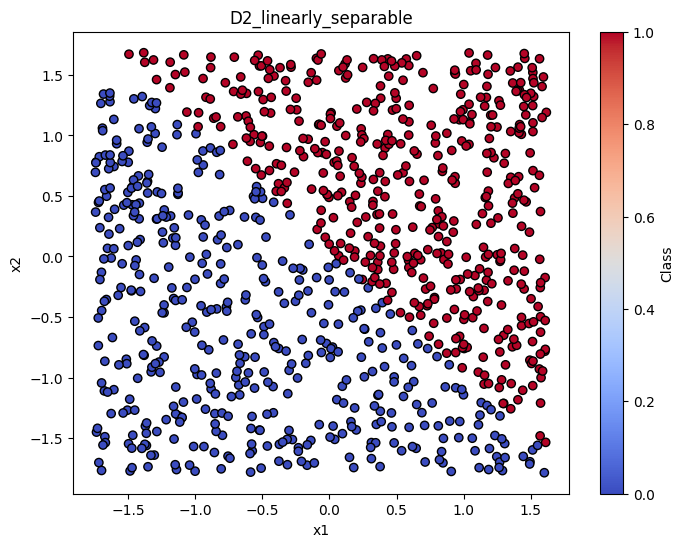

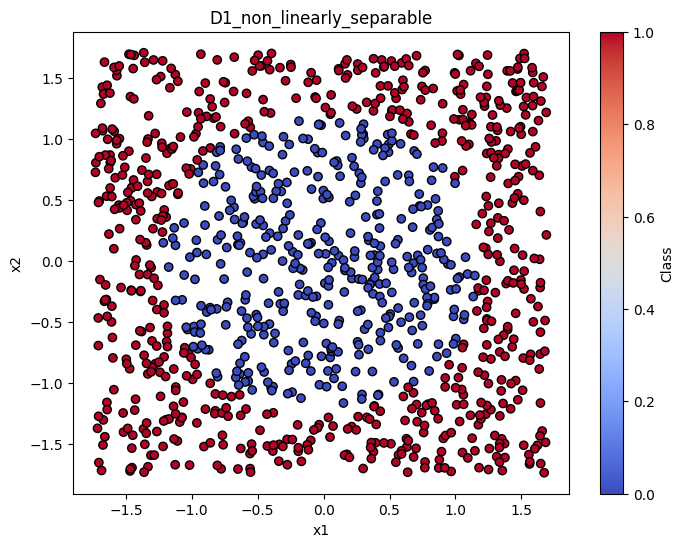

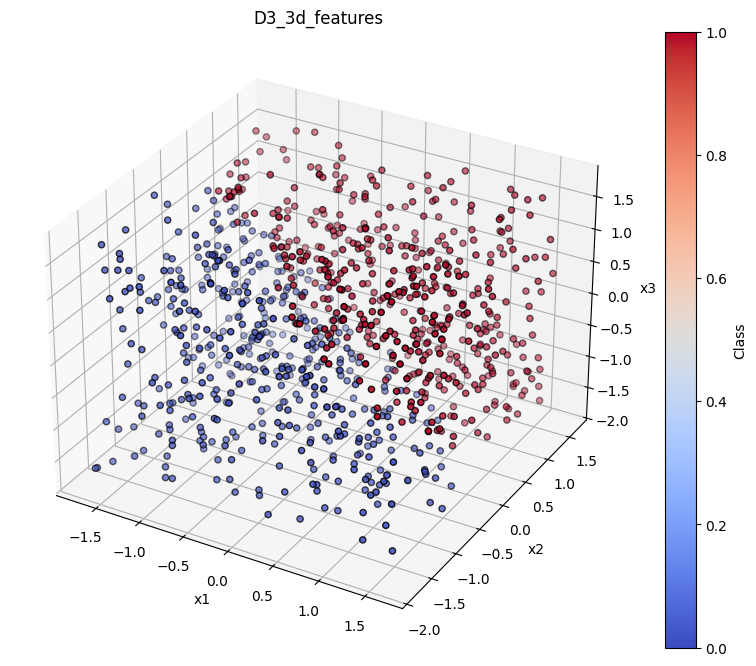

In [18]:
#File Path
linearly_separable_path = "/content/drive/MyDrive/AI/DL/D2_linearly_separable.csv"
non_linearly_separable_path = "/content/drive/MyDrive/AI/DL/D1_non_linearly_separable.csv"
features_3d_path = "/content/drive/MyDrive/AI/DL/D3_3d_features.csv"

dataset_paths = (linearly_separable_path,non_linearly_separable_path,features_3d_path)

# Load datasets
X1_train, X1_val, X1_test, y1_train, y1_val, y1_test, scaler1 = load_process_data(linearly_separable_path)
X2_train, X2_val, X2_test, y2_train, y2_val, y2_test, scaler2 = load_process_data(non_linearly_separable_path)
X3_train, X3_val, X3_test, y3_train, y3_val, y3_test, scaler3 = load_process_data(features_3d_path)

# Plot datasets
plot_2d_dataset(X1_train, y1_train, "D2_linearly_separable")
plot_2d_dataset(X2_train, y2_train, "D1_non_linearly_separable")
plot_3d_dataset(X3_train, y3_train, "D3_3d_features")

In [19]:
# Train the shallow neural network
def train_shallow_nn(X_train, y_train, n_hidden, learning_rate, epochs, activation, activation_derivative):
    n_input = X_train.shape[1]
    W1, b1, W2, b2 = initialize_parameters(n_input, n_hidden)

    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2, activation)
        loss = binary_cross_entropy(y_train, A2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, Z1, A1, A2, W2, activation_derivative)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % 100 == 0:
            print(f"Epoch {i}: Loss = {loss:.4f}")

    return W1, b1, W2, b2

In [12]:
# ReLU  function
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [13]:
# Initialize parameters for shallow neural network
def initialize_parameters(n_input, n_hidden):
    W1 = np.random.randn(n_hidden, n_input) * 0.01
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(1, n_hidden) * 0.01
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

In [14]:
# Forward propagation
def forward_propagation(X, W1, b1, W2, b2, activation):
    Z1 = np.dot(W1, X.T) + b1
    A1 = activation(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [15]:
# Backward propagation
def backward_propagation(X, y, Z1, A1, A2, W2, activation_derivative):
    m = X.shape[0]
    dZ2 = A2 - y.T
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * activation_derivative(Z1)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

In [16]:
# Predict Shallow
def predict_shallow_nn(X, W1, b1, W2, b2, activation):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2, activation)
    return (A2 > 0.5).astype(int).T

In [25]:
# Train shallow neural network on each dataset
n_hidden = 1
learning_rate = 0.01
epochs = 1000

activation_functions = {
    "sigmoid": (sigmoid, sigmoid),
    "relu": (relu, relu_derivative)
}

for activation_function in activation_functions:
  activation, activation_derivative = activation_functions[activation_function]

  for dataset_path in dataset_paths:
    X_train, X_val, X_test, y_train, y_val, y_test, scaler = load_process_data(dataset_path)
    W1, b1, W2, b2 = train_shallow_nn(X_train, y_train, n_hidden, learning_rate, epochs, activation, activation_derivative)
    y_val_pred = predict_shallow_nn(X_val, W1, b1, W2, b2, activation)
    accuracy = np.mean(y_val_pred == y_val) * 100
    print(f"Validation Accuracy {activation_function} for {dataset_path}: {accuracy:.2f}%")

Epoch 0: Loss = 643.9256
Epoch 100: Loss = 643.8185
Epoch 200: Loss = 643.7611
Epoch 300: Loss = 643.7301
Epoch 400: Loss = 643.7135
Epoch 500: Loss = 643.7046
Epoch 600: Loss = 643.6999
Epoch 700: Loss = 643.6975
Epoch 800: Loss = 643.6966
Epoch 900: Loss = 643.6964
Validation Accuracy sigmoid for /content/drive/MyDrive/AI/DL/D2_linearly_separable.csv: 45.73%
Epoch 0: Loss = 726.1823
Epoch 100: Loss = 712.4077
Epoch 200: Loss = 705.0153
Epoch 300: Loss = 701.0300
Epoch 400: Loss = 698.8716
Epoch 500: Loss = 697.6978
Epoch 600: Loss = 697.0573
Epoch 700: Loss = 696.7069
Epoch 800: Loss = 696.5147
Epoch 900: Loss = 696.4092
Validation Accuracy sigmoid for /content/drive/MyDrive/AI/DL/D1_non_linearly_separable.csv: 64.89%
Epoch 0: Loss = 661.2543
Epoch 100: Loss = 661.1779
Epoch 200: Loss = 661.1372
Epoch 300: Loss = 661.1154
Epoch 400: Loss = 661.1037
Epoch 500: Loss = 661.0976
Epoch 600: Loss = 661.0945
Epoch 700: Loss = 661.0931
Epoch 800: Loss = 661.0926
Epoch 900: Loss = 661.0927
Va

Sigmoid Result

```
Epoch 0: Loss = 644.0390
Epoch 100: Loss = 643.8091
Epoch 200: Loss = 643.7336
Epoch 300: Loss = 643.7084
Epoch 400: Loss = 643.7000
Epoch 500: Loss = 643.6972
Epoch 600: Loss = 643.6964
Epoch 700: Loss = 643.6964
Epoch 800: Loss = 643.6969
Epoch 900: Loss = 643.6976
Validation Accuracy for /content/drive/MyDrive/AI/DL/D2_linearly_separable.csv: 45.73%
Epoch 0: Loss = 729.1814
Epoch 100: Loss = 707.1208
Epoch 200: Loss = 699.9026
Epoch 300: Loss = 697.5035
Epoch 400: Loss = 696.6962
Epoch 500: Loss = 696.4222
Epoch 600: Loss = 696.3288
Epoch 700: Loss = 696.2968
Epoch 800: Loss = 696.2859
Epoch 900: Loss = 696.2821
Validation Accuracy for /content/drive/MyDrive/AI/DL/D1_non_linearly_separable.csv: 64.89%
Epoch 0: Loss = 661.2133
Epoch 100: Loss = 661.1332
Epoch 200: Loss = 661.1060
Epoch 300: Loss = 661.0967
Epoch 400: Loss = 661.0936
Epoch 500: Loss = 661.0927
Epoch 600: Loss = 661.0927
Epoch 700: Loss = 661.0931
Epoch 800: Loss = 661.0939
Epoch 900: Loss = 661.0950
Validation Accuracy for /content/drive/MyDrive/AI/DL/D3_3d_features.csv: 47.32%
```




Relu Result



```
Epoch 0: Loss = 643.9330
Epoch 100: Loss = 643.8394
Epoch 200: Loss = 643.7826
Epoch 300: Loss = 643.7481
Epoch 400: Loss = 643.7270
Epoch 500: Loss = 643.7140
Epoch 600: Loss = 643.7061
Epoch 700: Loss = 643.7021
Epoch 800: Loss = 643.7032
Epoch 900: Loss = 643.7155
Validation Accuracy for /content/drive/MyDrive/AI/DL/D2_linearly_separable.csv: 45.73%
Epoch 0: Loss = 727.8054
Epoch 100: Loss = 715.5085
Epoch 200: Loss = 708.0446
Epoch 300: Loss = 703.5007
Epoch 400: Loss = 700.7246
Epoch 500: Loss = 699.0224
Epoch 600: Loss = 697.9756
Epoch 700: Loss = 697.3299
Epoch 800: Loss = 696.9308
Epoch 900: Loss = 696.6837
Validation Accuracy for /content/drive/MyDrive/AI/DL/D1_non_linearly_separable.csv: 64.89%
Epoch 0: Loss = 661.2632
Epoch 100: Loss = 661.1958
Epoch 200: Loss = 661.1550
Epoch 300: Loss = 661.1304
Epoch 400: Loss = 661.1155
Epoch 500: Loss = 661.1066
Epoch 600: Loss = 661.1014
Epoch 700: Loss = 661.0985
Epoch 800: Loss = 661.0976
Epoch 900: Loss = 661.0994
Validation Accuracy for /content/drive/MyDrive/AI/DL/D3_3d_features.csv: 47.32%
```



Sigmoid and ReLU show a reduction in loss over epochs, indicating that training is happening, the decrease in loss is very slow, probably underfitting.

# Part 2

In [ ]:
import os
import numpy as np
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
# Define dataset path
dataset_path = "/content/drive/MyDrive/AI/DL/mini_frontal_dataset/Train"  # Change this to your dataset folder
#dataset_path = "/content/drive/MyDrive/AI/DL/Full_facial_dataset"  # Change this to your dataset folder
image_size = (48, 48)  # Resize images to this shape , this can be changed if you want

X = []  # Image data
y = []  # Labels
class_names = sorted(os.listdir(dataset_path))  # Get class names in sorted order
class_mapping = {name: idx for idx, name in enumerate(class_names)}  # Assign a numerical label

# Load images and labels
for category in class_names:
    category_path = os.path.join(dataset_path, category)

    if os.path.isdir(category_path):  # Ensure it's a folder
        for img_name in os.listdir(category_path):
          if img_name=='.DS_Store':
            continue
          img_path = os.path.join(category_path, img_name)
          #print(img_name)
          # Read image and preprocess
          img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
          img = cv2.resize(img, image_size)  # Resize
          img = img.astype("float32") / 255.0  # Normalize pixel values

          X.append(img)  # Append image
          y.append(class_mapping[category])  # Append label

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

# Reshape for CNN input (batch, height, width, channels)
X = X.reshape(-1, image_size[0], image_size[1], 1)

# One-hot encode labels
num_classes = len(class_names)
y = to_categorical(y, num_classes)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print dataset info
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")
print(f"Image shape: {X_train.shape[1:]} (height, width, channels)")
print(f"Number of classes: {num_classes}")



Training samples: 323, Testing samples: 81
Image shape: (48, 48, 1) (height, width, channels)
Number of classes: 13


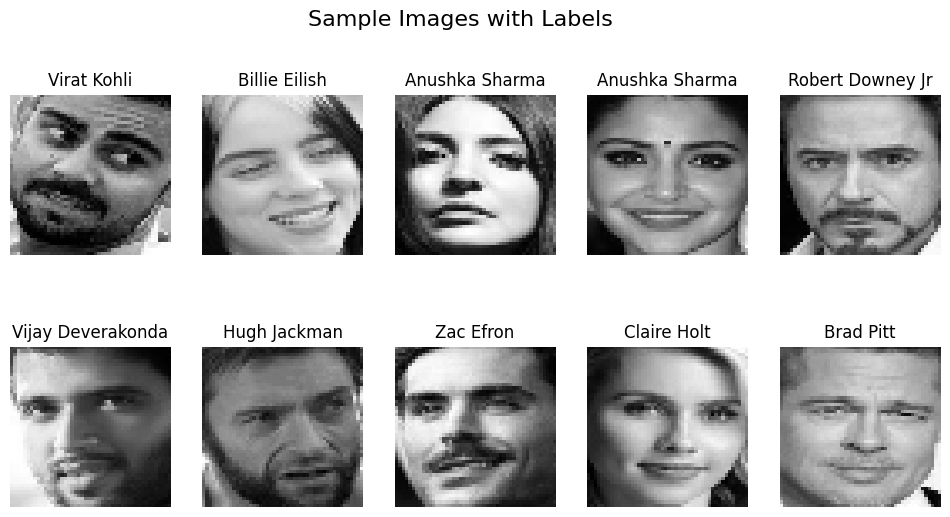

In [ ]:

# Function to visualize sample images with labels
def visualize_samples(X, y, class_names, num_samples=10):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # 2 rows, 5 columns
    axes = axes.ravel()

    indices = np.random.choice(len(X), num_samples, replace=False)  # Random selection

    for i, idx in enumerate(indices):
        img = X[idx].squeeze()  # Remove extra channel dimension
        label = np.argmax(y[idx])  # Get class index from one-hot encoding
        axes[i].imshow(img, cmap="gray")  # Display grayscale image
        axes[i].set_title(class_names[label])  # Show class name
        axes[i].axis("off")  # Hide axes

    plt.suptitle("Sample Images with Labels", fontsize=16)
    plt.show()

# Call the function to visualize training set images
visualize_samples(X_train, y_train, class_names)




In [ ]:
# Convert to Flatten Images
X = np.array(X).reshape(-1, image_size[0], image_size[1], 1)
y = np.array(y)
num_classes = len(class_names)
y = to_categorical(y, num_classes)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

layers: [256, 128, 64]
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.1446 - loss: 2.8944 - val_accuracy: 0.0494 - val_loss: 5.6482
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4676 - loss: 1.6910 - val_accuracy: 0.1111 - val_loss: 5.3290
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5714 - loss: 1.3422 - val_accuracy: 0.1111 - val_loss: 4.4340
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6103 - loss: 1.2653 - val_accuracy: 0.1111 - val_loss: 4.6623
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6747 - loss: 1.0559 - val_accuracy: 0.1111 - val_loss: 4.5003
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6601 - loss: 1.1411 - val_accuracy: 0.1111 - val_loss: 4.1997
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7164 - loss: 1.0241 - val_accuracy: 0.1111 - val_loss: 3.9558
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6979 - loss: 1.

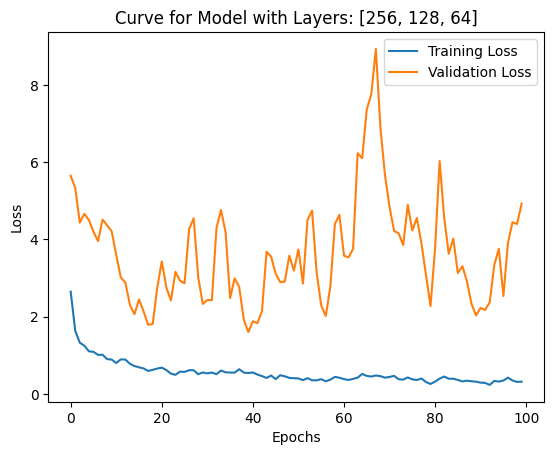

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3324 - loss: 4.6187
Accuracy for model [256, 128, 64]: 0.3210

layers: [512, 256, 128, 64]
Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.1191 - loss: 2.8963 - val_accuracy: 0.0864 - val_loss: 3.6959
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4200 - loss: 1.7442 - val_accuracy: 0.1111 - val_loss: 3.4683
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6028 - loss: 1.4275 - val_accuracy: 0.1481 - val_loss: 3.0027
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5510 - loss: 1.4265 - val_accuracy: 0.0988 - val_loss: 3.2043
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5511 - loss: 1.3427 - val_accuracy: 0.2469 - val_loss: 3.0965
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6691 - loss: 1.0834 - val_accuracy: 0.2963 - val_loss: 2.3561
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6732 - loss: 1.0507 - v

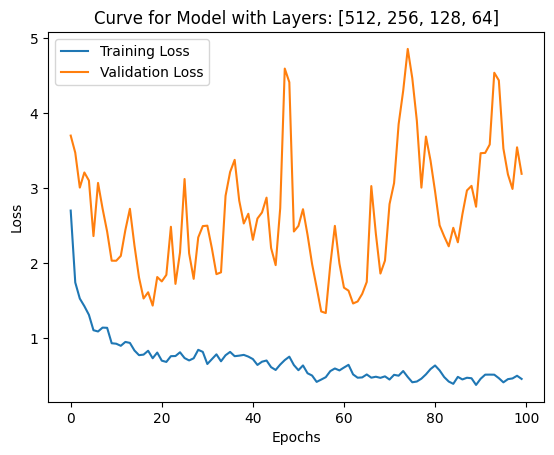

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3951 - loss: 3.1805
Accuracy for model [512, 256, 128, 64]: 0.4074



In [ ]:
#Neural Network Model
def create_model(hidden_layers=[256, 128, 64], dropout_rate=0.1, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(image_size[0] * image_size[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and compare models
hidden_layer_configs = [[256, 128, 64], [512, 256, 128, 64]]
for config in hidden_layer_configs:
    print(f"layers: {config}")
    model = create_model(hidden_layers=config, dropout_rate=0.1, learning_rate=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

    # Plot training curve
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Curve for Model with Layers: {config}')
    plt.show()

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Accuracy for model {config}: {test_acc:.4f}\n")

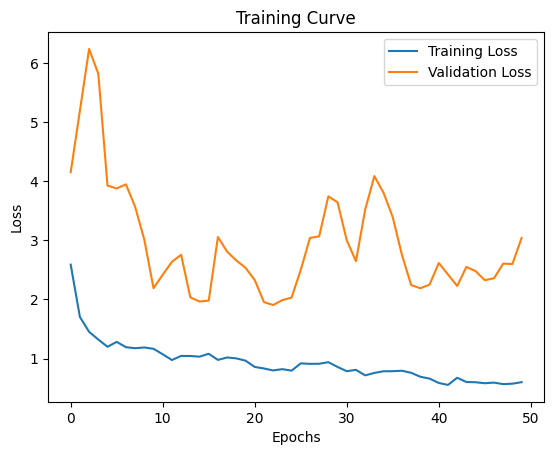

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4085 - loss: 2.8870
Test Accuracy: 0.3951


In [ ]:
# Plot and Evaluate
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Curve')
plt.show()


test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
# Preditc faces
def predict_faces(files, model, class_names):
    for img_name in os.listdir(files):
        img_path = os.path.join(files, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, image_size)
        img = img.astype("float32") / 255.0
        img = img.reshape(1, -1)  # Flatten to match model input

        prediction = model.predict(img)
        predicted_class = class_names[np.argmax(prediction)]

        plt.imshow(img.reshape(image_size), cmap='gray')
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


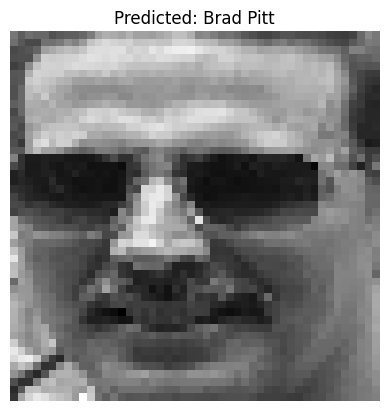

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


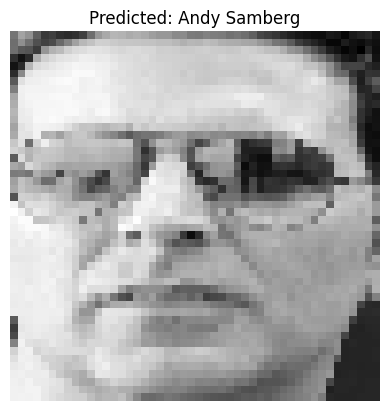

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


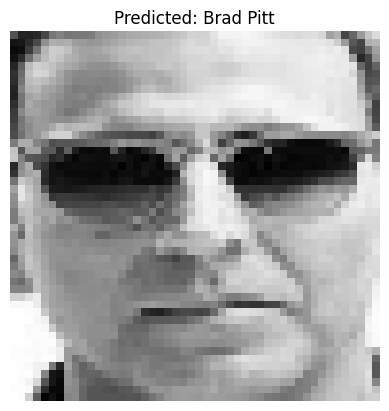

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


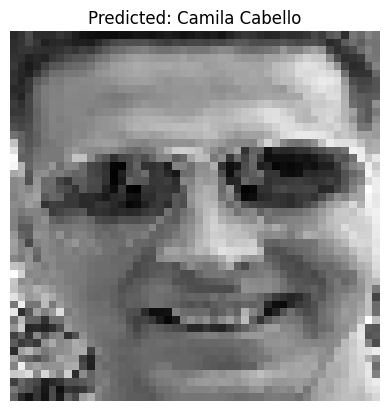

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


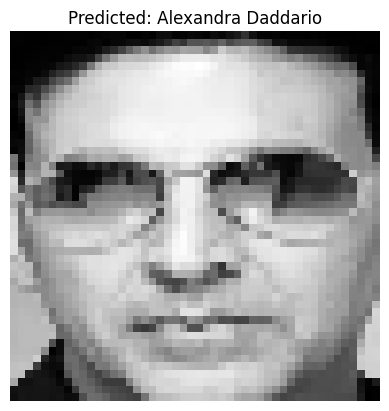

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


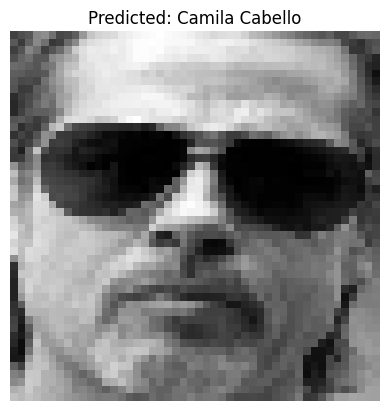

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


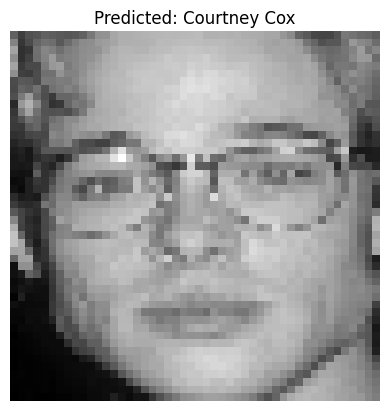

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


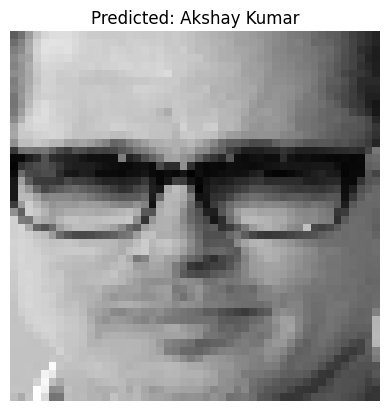

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


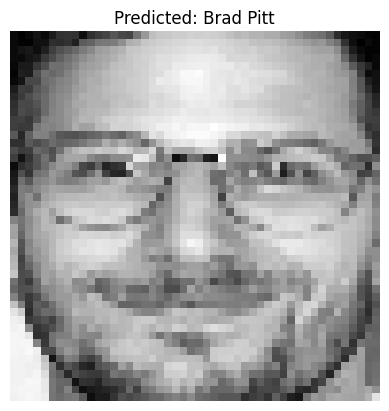

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


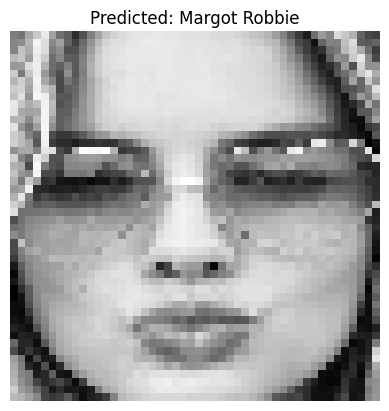

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


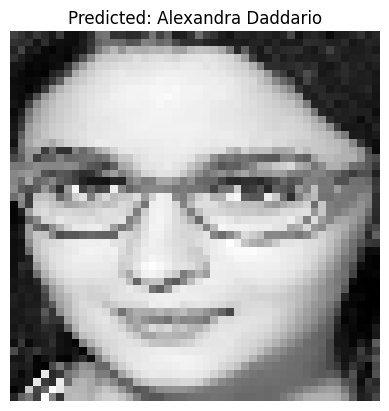

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


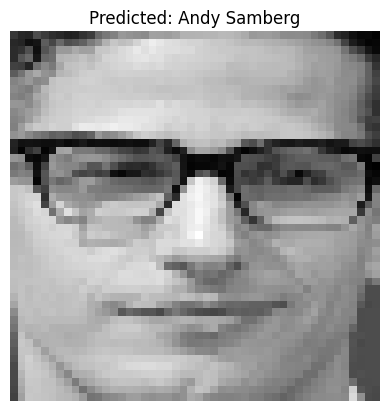

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


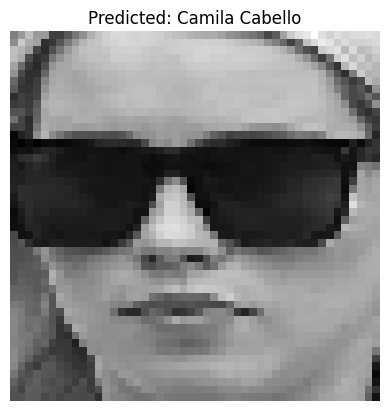

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


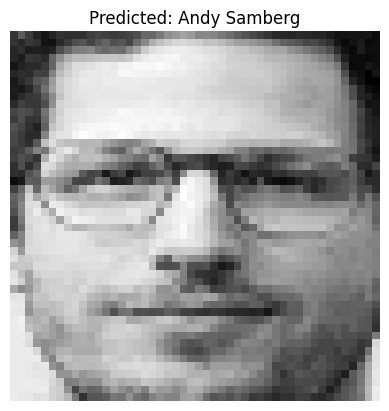

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


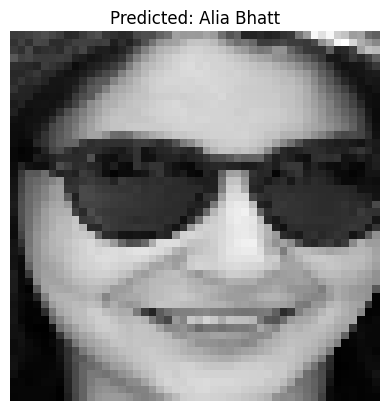

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


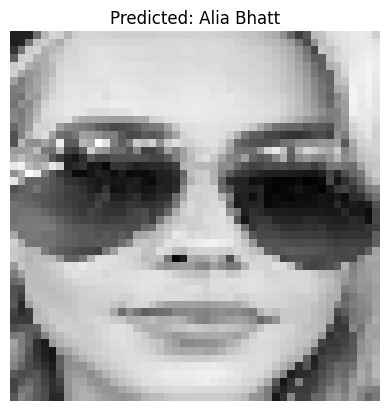

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
predict_faces("/content/drive/MyDrive/AI/DL/mini_frontal_dataset/Test", model, class_names)